## Multiclass Classification: IRIS Dataset
https://archive.ics.uci.edu/ml/datasets/iris

** Dataset Information: **

The data set contains 3 classes of iris plant (Iris setosa, Iris virginica and Iris versicolor) of 50 samples each, 150 samples in total.

** Attribute Information: (4 features and 1 class)**

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica

** Objective of this project **

predict class of iris plant (Setosa, Versicolour and Virginica) based on sepal/petal measurements (features)

## Data

In [1]:
options(warn=-1)
# Load Data
df  <- read.csv('iris.data',header=FALSE)

In [2]:
# Inspect Data
head(df,3)
colnames(df) <- c('Sepal_length', 'Sepal_width', 'Petal_length', 
                     'Petal_width', 'label')

V1,V2,V3,V4,V5
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa


In [49]:
dim(df)

[1] 150   5

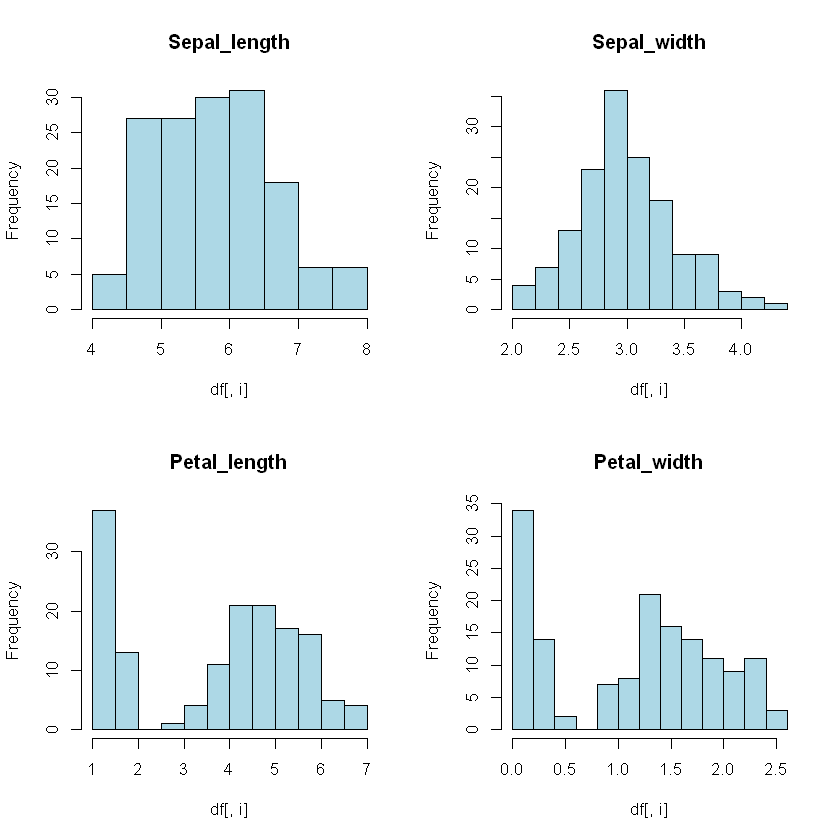

In [5]:
par(mfrow=c(2,2))
for(i in 1:4) {
    hist(df[,i], main=names(df)[i], col = 'lightblue')
}

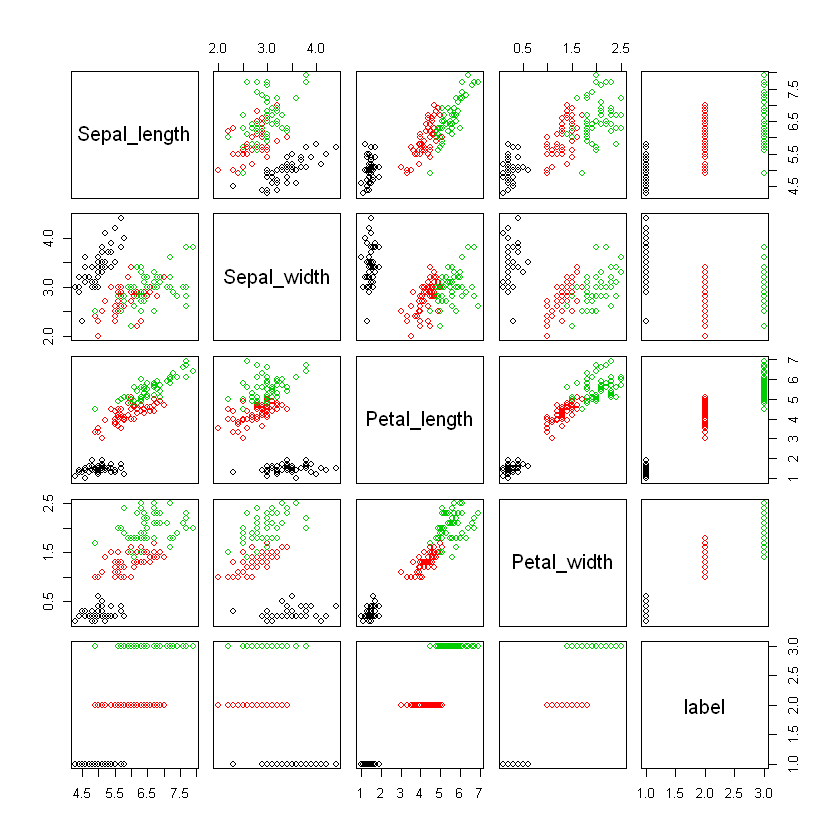

In [51]:
pairs(df,col=df$label)

In [52]:
str(df)

'data.frame':	150 obs. of  5 variables:
 $ Sepal_length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal_width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal_length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal_width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ label       : Factor w/ 3 levels "Iris-setosa",..: 1 1 1 1 1 1 1 1 1 1 ...


In [53]:
summary(df)

  Sepal_length    Sepal_width     Petal_length    Petal_width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.054   Mean   :3.759   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
             label   
 Iris-setosa    :50  
 Iris-versicolor:50  
 Iris-virginica :50  
                     
                     
                     

In [54]:
table(df$label) #imbalanced labels


    Iris-setosa Iris-versicolor  Iris-virginica 
             50              50              50 

In [55]:
any(is.na(df))

[1] FALSE

## Data preprocessing

In [56]:
library(caTools)
library(caret)
seed = 101 #random seed for reproducibility
set.seed(seed) 

** Encode Label **


 1  2  3 
50 50 50 

'data.frame':	150 obs. of  5 variables:
 $ Sepal_length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal_width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal_length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal_width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ label       : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...


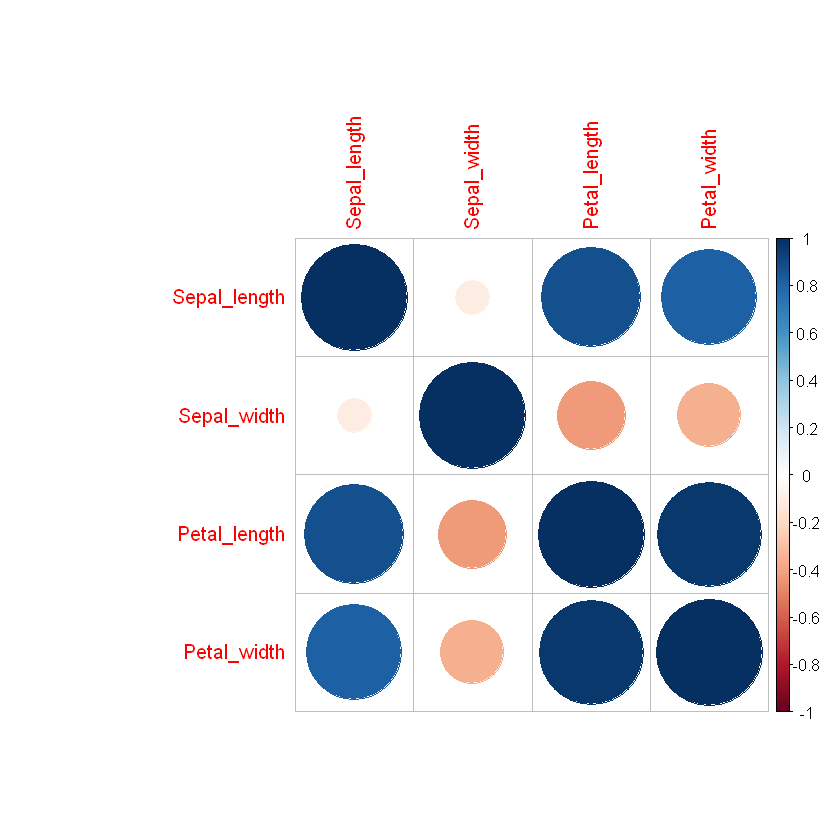

In [57]:
df$label = factor(df$label, 
                  levels = c('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                  labels=c(1,2,3))
table(df$label)
str(df)

library(corrplot)
corrplot(cor(df[-5]), method="circle")

** Split Train Test Sets **

In [58]:
split = sample.split(df$label, SplitRatio = 0.80)
train_set = subset(df, split == TRUE)
test_set = subset(df, split == FALSE)

** Scale features **

In [59]:
# standardize data
label_col  = 5
train_set[-label_col] = scale(train_set[-label_col])
test_set[-label_col] = scale(test_set[-label_col])
summary(train_set)

  Sepal_length       Sepal_width       Petal_length      Petal_width     
 Min.   :-1.70351   Min.   :-2.3673   Min.   :-1.5572   Min.   :-1.4545  
 1st Qu.:-0.89001   1st Qu.:-0.5708   1st Qu.:-1.2192   1st Qu.:-1.1876  
 Median :-0.07651   Median :-0.1216   Median : 0.3019   Median : 0.1468  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.73699   3rd Qu.: 0.5520   3rd Qu.: 0.7526   3rd Qu.: 0.8140  
 Max.   : 2.36400   Max.   : 3.0222   Max.   : 1.7666   Max.   : 1.7481  
 label 
 1:40  
 2:40  
 3:40  
       
       
       

## Baseline Model


Call:
summary.resamples(object = results)

Models: lda, glmnet, svm, knn, nb, cart, c50, bagging, rf, gbm 
Number of resamples: 5 

Accuracy 
             Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lda     0.9583333 0.9583333 1.0000000 0.9833333 1.0000000 1.0000000    0
glmnet  0.9166667 0.9583333 1.0000000 0.9750000 1.0000000 1.0000000    0
svm     0.9166667 0.9166667 0.9583333 0.9500000 0.9583333 1.0000000    0
knn     0.9583333 0.9583333 0.9583333 0.9666667 0.9583333 1.0000000    0
nb      0.9166667 0.9166667 0.9583333 0.9583333 1.0000000 1.0000000    0
cart    0.8750000 0.8750000 0.9166667 0.9166667 0.9583333 0.9583333    0
c50     0.8750000 0.9166667 0.9166667 0.9250000 0.9166667 1.0000000    0
bagging 0.9166667 0.9583333 0.9583333 0.9500000 0.9583333 0.9583333    0
rf      0.9166667 0.9583333 0.9583333 0.9666667 1.0000000 1.0000000    0
gbm     0.9166667 0.9583333 0.9583333 0.9666667 1.0000000 1.0000000    0

Kappa 
          Min. 1st Qu. Median   Mean 3rd Qu.  

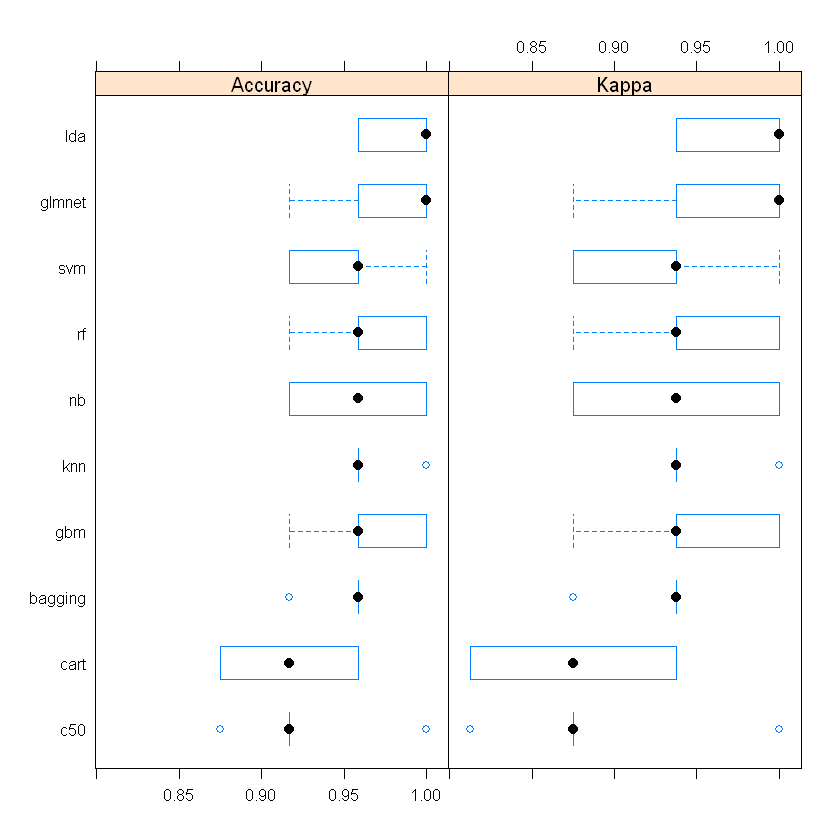

In [60]:
# cross validation
trControl <- trainControl(method="cv", number=5)
metric <- "Accuracy"

# train multiple models
# Linear Discriminant Analysis
set.seed(seed)
fit.lda <- train(label~., data=train_set, method="lda", 
                 metric=metric, trControl=trControl)
# GLMNET
set.seed(seed)
fit.glmnet <- train(label~., data=train_set, method="glmnet", 
                    metric=metric, trControl=trControl)
# SVM Radial
set.seed(seed)
fit.svmRadial <- train(label~., data=train_set, method="svmRadial", 
                       metric=metric, trControl=trControl, fit=FALSE)
# kNN
set.seed(seed)
fit.knn <- train(label~., data=train_set, method="knn", 
                 metric=metric, trControl=trControl)
# Naive Bayes
set.seed(seed)
fit.nb <- train(label~., data=train_set, method="nb", 
                metric=metric, trControl=trControl)
# CART
set.seed(seed)
fit.cart <- train(label~., data=train_set, method="rpart", 
                  metric=metric, trControl=trControl)
# C5.0
set.seed(seed)
fit.c50 <- train(label~., data=train_set, method="C5.0", 
                 metric=metric, trControl=trControl)
# Bagged CART
set.seed(seed)
fit.treebag <- train(label~., data=train_set, method="treebag", 
                     metric=metric, trControl=trControl)
# Random Forest
set.seed(seed)
fit.rf <- train(label~., data=train_set, method="rf", 
                metric=metric, trControl=trControl)
# Stochastic Gradient Boosting
set.seed(seed)
fit.gbm <- train(label~., data=train_set, method="gbm", 
                 metric=metric, trControl=trControl, verbose=FALSE)

# summarise results
results <- resamples(list(lda=fit.lda, glmnet=fit.glmnet,
    svm=fit.svmRadial, knn=fit.knn, nb=fit.nb, cart=fit.cart, c50=fit.c50,
    bagging=fit.treebag, rf=fit.rf, gbm=fit.gbm))
summary(results)
bwplot(results)

## Parameter Tuning
5 best algorithms: lda, glmnet, knn, rf, gbm

tuning parameters: http://topepo.github.io/caret/available-models.html

In [61]:
trControl <- trainControl(method='cv', number=5)
metric <- 'Accuracy'

#### Model 1: LDA

In [62]:
# grid search --> no tuning parameters
set.seed(seed)                    
gridSearch <- train(label~., data=train_set, method='lda',
                 metric=metric, trControl=trControl)
print(gridSearch)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 96, 96, 96, 96, 96 
Resampling results:

  Accuracy   Kappa
  0.9833333  0.975



#### Model 2: GLMNET

glmnet 

120 samples
  4 predictor
  3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 96, 96, 96, 96, 96 
Resampling results across tuning parameters:

  lambda  Accuracy   Kappa 
  0.000   0.9666667  0.9500
  0.001   0.9666667  0.9500
  0.002   0.9666667  0.9500
  0.003   0.9666667  0.9500
  0.004   0.9666667  0.9500
  0.005   0.9666667  0.9500
  0.006   0.9583333  0.9375
  0.007   0.9583333  0.9375
  0.008   0.9583333  0.9375
  0.009   0.9583333  0.9375
  0.010   0.9583333  0.9375
  0.011   0.9666667  0.9500
  0.012   0.9583333  0.9375
  0.013   0.9583333  0.9375
  0.014   0.9583333  0.9375
  0.015   0.9583333  0.9375
  0.016   0.9583333  0.9375
  0.017   0.9583333  0.9375
  0.018   0.9583333  0.9375
  0.019   0.9583333  0.9375
  0.020   0.9583333  0.9375
  0.021   0.9500000  0.9250
  0.022   0.9500000  0.9250
  0.023   0.9500000  0.9250
  0.024   0.9500000  0.9250
  0.025   0.9500000  0.9250
  0.026   0.9500000  0.9250
  0.0

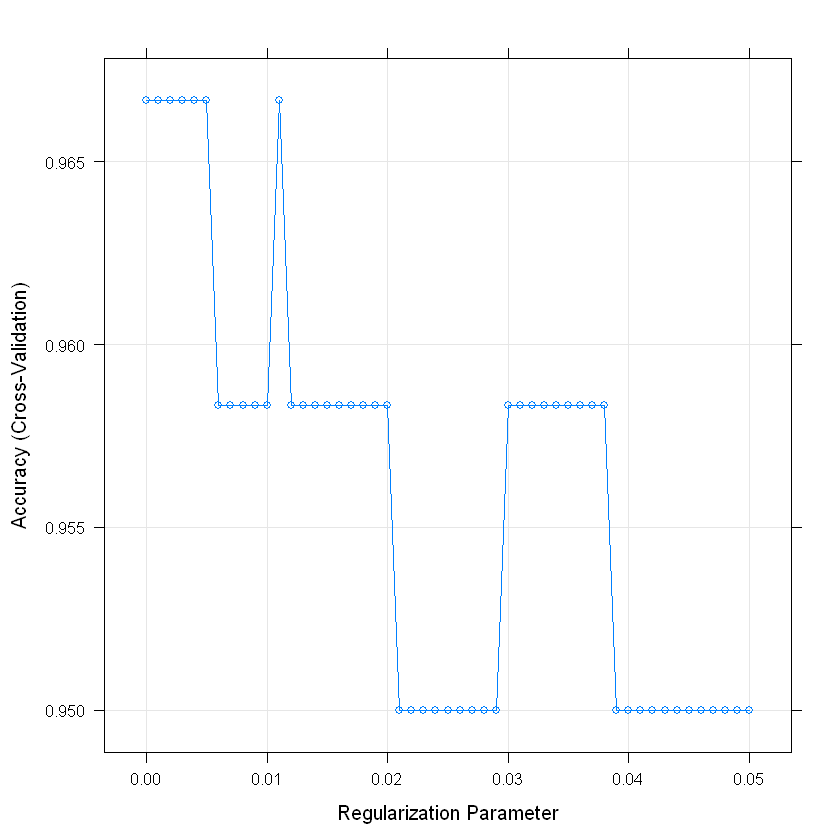

In [63]:
# grid search
set.seed(seed)
tuneGrid = expand.grid(alpha = 1,lambda = seq(0,0.05,by = 0.001))                       
gridSearch <- train(label~., data=train_set, method='glmnet',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)

#### Model 3. K Nearest Neighbors

k-Nearest Neighbors 

120 samples
  4 predictor
  3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 96, 96, 96, 96, 96 
Resampling results across tuning parameters:

  k   Accuracy   Kappa 
   1  0.9333333  0.9000
   2  0.9416667  0.9125
   3  0.9500000  0.9250
   4  0.9583333  0.9375
   5  0.9500000  0.9250
   6  0.9333333  0.9000
   7  0.9583333  0.9375
   8  0.9500000  0.9250
   9  0.9666667  0.9500
  10  0.9583333  0.9375
  11  0.9583333  0.9375
  12  0.9583333  0.9375
  13  0.9583333  0.9375
  14  0.9583333  0.9375
  15  0.9583333  0.9375

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.


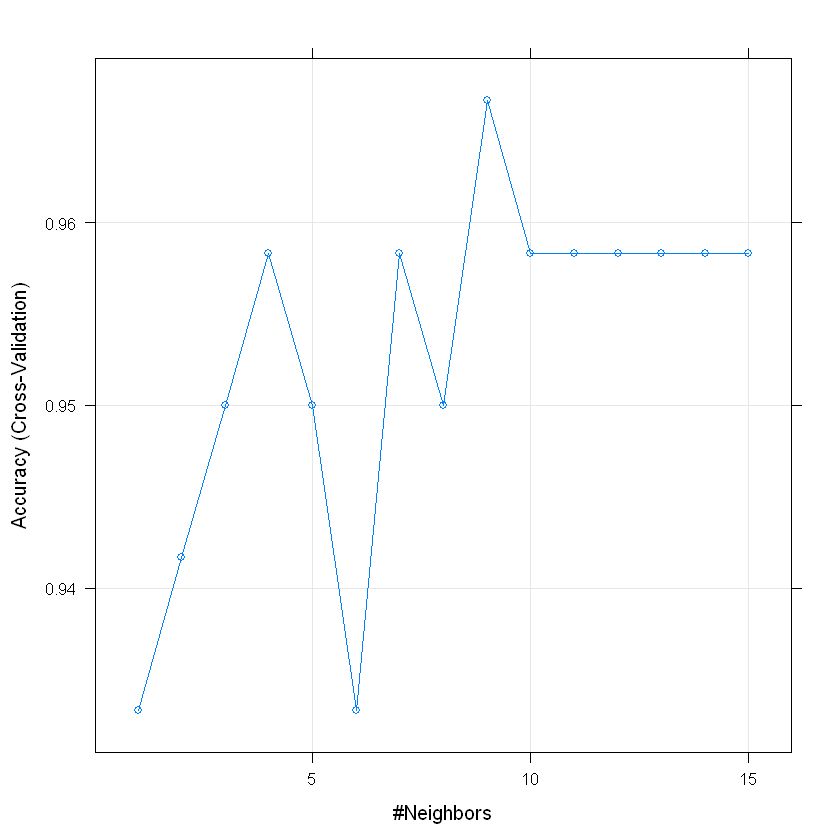

In [64]:
# grid search
set.seed(seed)
tuneGrid = expand.grid(.k=c(1:15))
gridSearch <- train(label~., data=train_set, method='knn',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)

#### Model 4: Random Forest

Random Forest 

120 samples
  4 predictor
  3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 96, 96, 96, 96, 96 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa
   1    0.9500000  0.925
   2    0.9666667  0.950
   3    0.9666667  0.950
   4    0.9666667  0.950
   5    0.9666667  0.950
   6    0.9666667  0.950
   7    0.9666667  0.950
   8    0.9666667  0.950
   9    0.9666667  0.950
  10    0.9666667  0.950

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


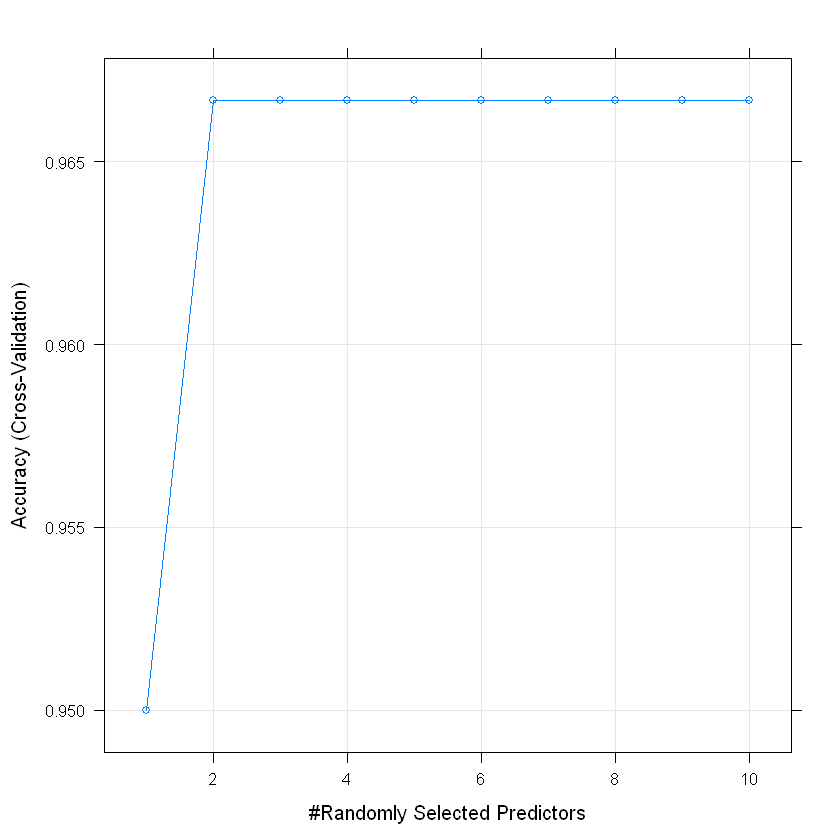

In [65]:
# grid search
set.seed(seed)
tuneGrid <- expand.grid(.mtry=c(1:10))
gridSearch <- train(label~., data=train_set, method='rf',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid, verbose=FALSE)
print(gridSearch)
plot(gridSearch)

#### Model 4: Stochastic Gradient Boosting

Stochastic Gradient Boosting 

120 samples
  4 predictor
  3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 96, 96, 96, 96, 96 
Resampling results across tuning parameters:

  shrinkage  interaction.depth  n.minobsinnode  n.trees  Accuracy   Kappa 
  0.01       1                  10              200      0.9583333  0.9375
  0.01       1                  10              300      0.9583333  0.9375
  0.01       1                  10              400      0.9583333  0.9375
  0.01       1                  10              500      0.9500000  0.9250
  0.01       1                  20              200      0.8916667  0.8375
  0.01       1                  20              300      0.9333333  0.9000
  0.01       1                  20              400      0.9416667  0.9125
  0.01       1                  20              500      0.9416667  0.9125
  0.01       3                  10              200      0.9583333  0.9375
  0.01       3   

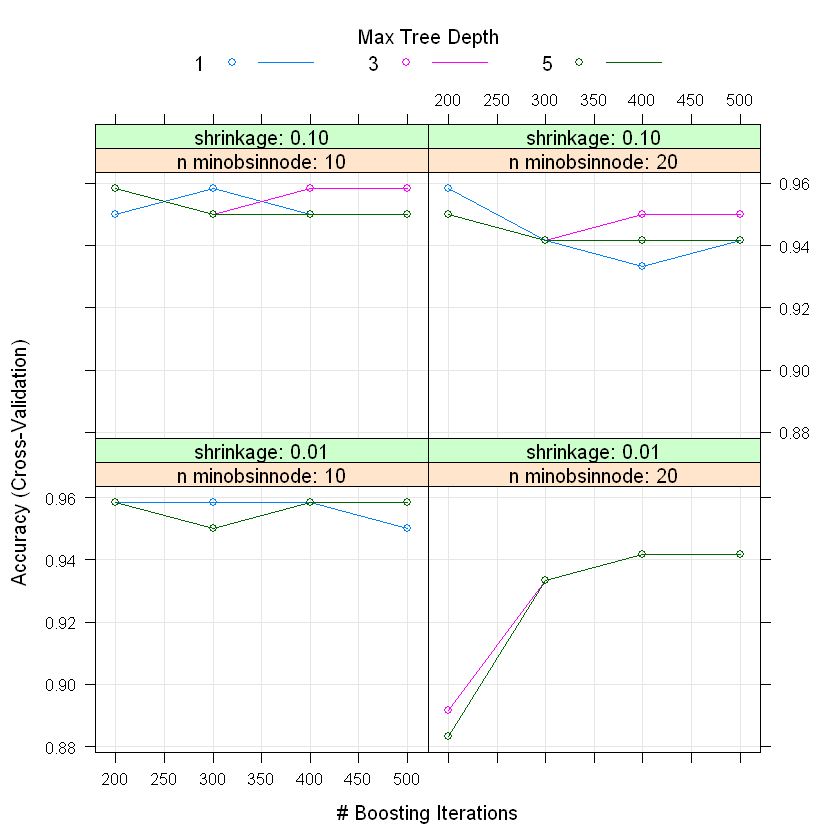

In [66]:
# grid search
set.seed(seed)
tuneGrid <- expand.grid(n.trees = c(200,300,400,500),
                       interaction.depth = c(1, 3, 5),
                       shrinkage = c(0.01,0.1),
                       n.minobsinnode = c(10,20))
gridSearch <- train(label~., data=train_set, method='gbm',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid, verbose=FALSE)
print(gridSearch)
plot(gridSearch)

## Final Model: Linear Discriminant Analysis (LDA)

In [67]:
trControl <- trainControl(method="cv", number=10)
metric <- "Accuracy"
set.seed(seed)
final.model <- train(label~., data=train_set, method='lda',
                 metric=metric, trControl=trControl)
print(final.model)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy   Kappa
  0.9833333  0.975



In [68]:
predictions = predict(final.model, newdata = train_set[-label_col])
confusionMatrix(predictions, train_set$label)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1 40  0  0
         2  0 39  1
         3  0  1 39

Overall Statistics
                                         
               Accuracy : 0.9833         
                 95% CI : (0.9411, 0.998)
    No Information Rate : 0.3333         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.975          
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            1.0000   0.9750   0.9750
Specificity            1.0000   0.9875   0.9875
Pos Pred Value         1.0000   0.9750   0.9750
Neg Pred Value         1.0000   0.9875   0.9875
Prevalence             0.3333   0.3333   0.3333
Detection Rate         0.3333   0.3250   0.3250
Detection Prevalence   0.3333   0.3333   0.3333
Balanced Accuracy      1.0000   0.9812   0.9812

#### Save and load the final model

In [69]:
# save the model to disk
saveRDS(final.model, 'final_model.rds')
#rm(final.model)

In [70]:
# load the model
final.model <- readRDS('final_model.rds')
print(final.model)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy   Kappa
  0.9833333  0.975



#### Final Model Evaluation with Test set

In [71]:
predictions = predict(final.model, newdata = test_set[-label_col])
confusionMatrix(predictions, test_set$label)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1 10  0  0
         2  0  9  0
         3  0  1 10

Overall Statistics
                                          
               Accuracy : 0.9667          
                 95% CI : (0.8278, 0.9992)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.963e-13       
                                          
                  Kappa : 0.95            
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            1.0000   0.9000   1.0000
Specificity            1.0000   1.0000   0.9500
Pos Pred Value         1.0000   1.0000   0.9091
Neg Pred Value         1.0000   0.9524   1.0000
Prevalence             0.3333   0.3333   0.3333
Detection Rate         0.3333   0.3000   0.3333
Detection Prevalence   0.3333   0.3000   0.3667
Balanced Accuracy      1.0000   0.9500   0.9750

## Summary

- Best model: **LDA** w/ default param


- Accuracy of test set: **96.7%**